# Gradient boosting model

MODEL_CONFIG = {
    'params_cv': {
        'model__n_estimators': [500],
        'model__learning_rate': [0.1],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 4, 10, 24],
        'model__min_samples_leaf': [3, 5, 10],
        'model__subsample': [0.9],
        'model__max_features': ['sqrt', 'log2'], 
        #'model__n_iter_no_change' : [5, 10], 
        #'model__validation_fraction' : [0.1]
    },
    'refit': True, 
    'do_nested_resampling': True, 
    'monitor' : monitor, 
    'path' : RESULTS_DIR, 
    'fname_cv' : 'gb_common_genes'}

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import logging

# Setup paths
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# Setup directories
RESULTS_DIR = os.path.join(os.getcwd(), 'results')
os.makedirs(RESULTS_DIR, exist_ok=True)

from models.modelling_process import ModellingProcess
from utils.visualization import plot_survival_curves

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)


import pickle

In [3]:
# model to get feature importance
def get_feature_imp(model): 
    df = pd.DataFrame()
    df['features'] = model.feature_names_in_
    df['importance'] = model.feature_importances_
    
    df = df[df['importance'] > 0].sort_values(by = 'importance', ascending=False)
    return df

## 1 Loss CoxPH

### 1.1 Model with intersection exprs. data 

In [9]:
DATA_CONFIG = {
    'use_pca': False,
    'pca_threshold': 0.85,
    'gene_type': 'intersection',
    'use_imputed': True,
    'select_random' : False, 
    'use_cohorts': False
}

In [5]:
mp = ModellingProcess()

In [10]:
mp.prepare_data(DATA_CONFIG, PROJECT_ROOT)

2024-12-29 12:03:02,609 - INFO - Loading data...
2024-12-29 12:03:34,155 - INFO - Loaded data: 1091 samples, 13214 features


In [2]:
with open('results_new/model/test.pkl', 'rb') as f:
    model_int = pickle.load(f)

In [ ]:
get_feature_imp(model_int)

,features,importance
2913,ENSG00000108821,0.002772
5946,ENSG00000137558,0.002174
6478,ENSG00000141756,0.001985
2693,ENSG00000106483,0.001941
2409,ENSG00000104517,0.001855
...,...,...
10119,ENSG00000171804,0.000001
4908,ENSG00000129354,0.000001
278,ENSG00000013503,0.000001
12617,ENSG00000203772,0.000001


In [ ]:
#### TODO: How to get effect direction of feature + How to select the most important? 

c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names
  warnings.warn(
c:\Users\laeti\PCaPrognostics\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingSurvivalAnalysis wa

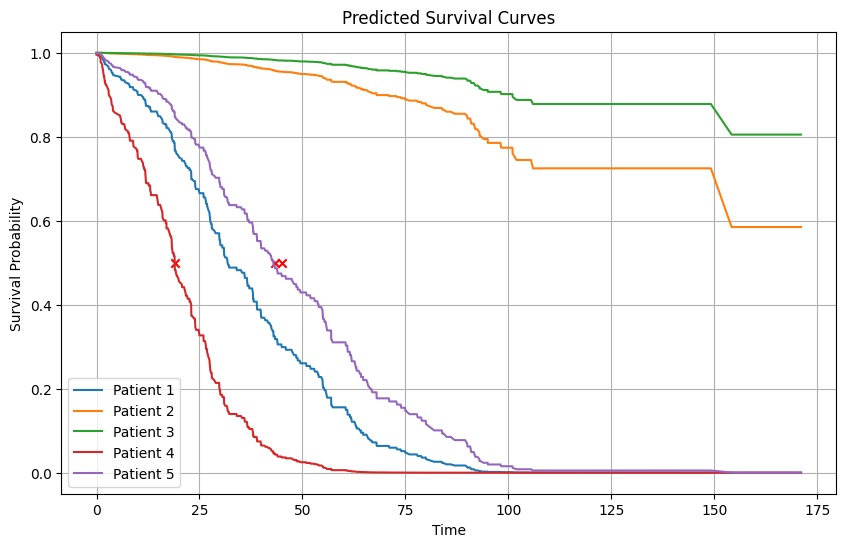

In [11]:
plot_survival_curves(model_int, mp.X, mp.y, mp.groups)

### 1.2 Model with imputed exprs. data 

### 1.3 Model with only pData